In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# %%
#Load the data
DATA_PATH = '../data/'

dataframe = pd.read_csv(DATA_PATH + 'combined_all_employees_salaries_cleaned.csv')
print(dataframe.head())

               Name               Department Name                      Title  \
0    Abadi,Kidani A          Assessing Department     Property Officer (Asn)   
1    Ablon,Jordan N  ASD Office Of Labor Relation      Asst Corp Counsel III   
2  Accardi,Patricia  Transportation-Parking Clerk  Chief Claims Investigator   
3    Ackerly,Lyn E.         Boston Public Library        Spec Library Asst I   
4    Adams,Carey L.                Law Department                 Prin Clerk   

    Regular  Retro    Other  Overtime  Injured  Detail  Quinn  Total Earnings  \
0  33065.38    0.0     0.00    379.49      0.0     0.0    0.0        33444.87   
1  76051.24    0.0  1321.03      0.00      0.0     0.0    0.0        77372.27   
2  56430.79    0.0     0.00    418.58      0.0     0.0    0.0        56849.37   
3  35058.78    0.0     0.00    439.19      0.0     0.0    0.0        35497.97   
4  41588.83    0.0     0.00      0.00      0.0     0.0    0.0        41588.83   

   Zip Code  Year  
0      2118 

Regular IQR: 68844.715
Retro IQR: 0.0
Other IQR: 1970.0
Overtime IQR: 1250.975
Injured IQR: 0.0
Detail IQR: 0.0
Quinn IQR: 0.0
Total Earnings IQR: 78221.83499999999
Zip Code IQR: 14.0
Year IQR: 7.0


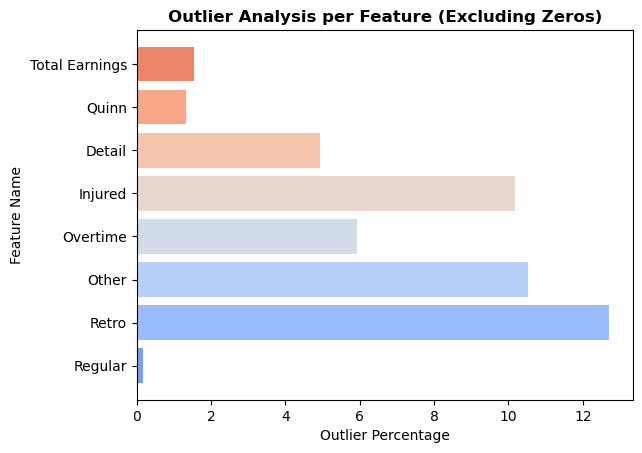

In [18]:
#Lets use the IQR strategy to detect the outliers per column
# IQR = Q3 - Q1

# %%
#Calculate the IQR for each column which is a number
for column in dataframe.select_dtypes(include=[np.number]):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f'{column} IQR: {IQR}')

#Plot the percentage outliers per column
# %%
#Calculate the percentage of outliers per column
outliers = []
for column in dataframe.select_dtypes(include=[np.number]):
    if column == 'Year':
        continue
    if column == 'Zip Code':
        continue
    non_zero_values = dataframe[dataframe[column] != 0][column]
    Q1 = non_zero_values.quantile(0.25)
    Q3 = non_zero_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers.append(non_zero_values[(non_zero_values < lower_bound) | (non_zero_values > upper_bound)].shape[0] / non_zero_values.shape[0] * 100)

import numpy as np
import matplotlib.pyplot as plt

columns = dataframe[1:].select_dtypes(include=[np.number]).columns[:-2]
colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(columns))) # Using a colormap for distinction

plt.barh(columns, outliers, color=colors)
plt.xlabel('Outlier Percentage')
plt.ylabel('Feature Name')
# Make the title bold
plt.title('Outlier Analysis per Feature (Excluding Zeros)', fontweight='bold')
# plt.gca().invert_yaxis()  # Keeps the order consistent
plt.show()




